**Capital Asset Pricing Model**


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
stocks_df = pd.read_csv('stocks_dataset.csv')
stocks_df

Date          FB       TWTR        NFLX          BA          T  \
0      11/7/2013   47.560001  44.900002   46.694286  131.509995  35.110001   
1      11/8/2013   47.529999  41.650002   47.842857  133.490005  35.169998   
2     11/11/2013   46.200001  42.900002   48.272858  132.529999  35.029999   
3     11/12/2013   46.610001  41.900002   47.675713  132.330002  35.169998   
4     11/13/2013   48.709999  42.599998   47.897144  133.169998  35.070000   
...          ...         ...        ...         ...         ...        ...   
1694    8/3/2020  251.960007  36.389999  498.619995  162.270004  29.620001   
1695    8/4/2020  249.830002  36.349998  509.640015  165.070007  30.010000   
1696    8/5/2020  249.119995  36.790001  502.109985  174.279999  29.850000   
1697    8/6/2020  265.279999  37.689999  509.079987  172.199997  29.840000   
1698    8/7/2020  268.440002  37.139999  494.730011  170.020004  30.020000   

            MGM         TSLA        sp500  
0     18.580000   139.770004  1747.150024  
1     19.090000   137.949997  1770.609985  
2     19.200001   144.699997  1771.890015  
3     19.260000   137.800003  1767.689941  
4     19.700001   138.699997  1782.000000  
...         ...          ...          ...  
1694  16.320000  1485.000000  3294.610107  
1695  16.719999  1487.000000  3306.510010  
1696  16.719999  1485.020020  3327.770020  
1697  18.459999  1489.579956  3349.159912  
1698  19.030001  1452.709961  3351.280029  

[1699 rows x 9 columns]

In [5]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [6]:
stocks_df.describe()

FB         TWTR         NFLX           BA            T  \
count  1699.000000  1699.000000  1699.000000  1699.000000  1699.000000   
mean    135.966863    31.296698   195.423654   218.325633    35.296986   
std      50.062473    11.508628   127.700712    98.968191     3.412142   
min      44.820000    14.010000    44.887142    95.010002    26.770000   
25%      88.080002    19.600001    90.474998   132.840004    32.790001   
50%     136.759995    31.610001   143.830002   158.289993    34.900002   
75%     178.075005    38.229999   320.024993   334.360001    38.004999   
max     268.440002    73.309998   548.729980   440.619995    43.470001   

               MGM         TSLA        sp500  
count  1699.000000  1699.000000  1699.000000  
mean     25.720865   311.299388  2413.219428  
std       5.200605   203.097452   424.825240  
min       7.140000   120.500000  1741.890015  
25%      21.935001   218.829994  2053.294921  
50%      25.879999   253.740005  2360.159912  
75%      29.250000   323.565002  2783.330078  
max      38.029999  1643.000000  3386.149902

In [7]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [8]:

normalize(stocks_df)

Date        FB      TWTR       NFLX        BA         T       MGM  \
0      11/7/2013  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1      11/8/2013  0.999369  0.927617   1.024598  1.015056  1.001709  1.027449   
2     11/11/2013  0.971405  0.955457   1.033807  1.007756  0.997721  1.033369   
3     11/12/2013  0.980025  0.933185   1.021018  1.006235  1.001709  1.036598   
4     11/13/2013  1.024180  0.948775   1.025760  1.012623  0.998861  1.060280   
...          ...       ...       ...        ...       ...       ...       ...   
1694    8/3/2020  5.297729  0.810468  10.678394  1.233899  0.843634  0.878364   
1695    8/4/2020  5.252944  0.809577  10.914398  1.255190  0.854742  0.899892   
1696    8/5/2020  5.238015  0.819376  10.753136  1.325222  0.850185  0.899892   
1697    8/6/2020  5.577796  0.839421  10.902404  1.309406  0.849900  0.993541   
1698    8/7/2020  5.644239  0.827171  10.595087  1.292830  0.855027  1.024220   

           TSLA     sp500  
0      1.000000  1.000000  
1      0.986979  1.013428  
2      1.035272  1.014160  
3      0.985905  1.011756  
4      0.992345  1.019947  
...         ...       ...  
1694  10.624597  1.885705  
1695  10.638906  1.892516  
1696  10.624740  1.904685  
1697  10.657365  1.916927  
1698  10.393575  1.918141  

[1699 rows x 9 columns]

In [9]:
def interactive_plot(df,title):
    fig = px.line(title =title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'],y=df[i],name=i)
    fig.show()

In [10]:
interactive_plot(stocks_df,'Prices')

In [11]:
interactive_plot(normalize(stocks_df),"Normalized Prices")

In [12]:
def daily_return(df):
    df_daily_return = df.copy()

    for i in df.columns[1:]:
        for j in range(1,len(df)):
            df_daily_return[i][j] = ((df[i][j]-df[i][j-1]) / df[i][j-1]) * 100

        df_daily_return[i][0] =0
    return df_daily_return

In [13]:
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Date        FB      TWTR      NFLX        BA         T        MGM  \
0      11/7/2013  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
1      11/8/2013 -0.063082 -7.238307  2.459768  1.505597  0.170883   2.744887   
2     11/11/2013 -2.798229  3.001200  0.898778 -0.719159 -0.398064   0.576223   
3     11/12/2013  0.887446 -2.331002 -1.237020 -0.150907  0.399655   0.312495   
4     11/13/2013  4.505467  1.670635  0.464452  0.634774 -0.284328   2.284533   
...          ...       ...       ...       ...       ...       ...        ...   
1694    8/3/2020 -0.674101 -0.027481  1.992307  2.702534  0.135230   1.429459   
1695    8/4/2020 -0.845374 -0.109923  2.210104  1.725521  1.316674   2.450974   
1696    8/5/2020 -0.284196  1.210462 -1.477519  5.579446 -0.533156   0.000000   
1697    8/6/2020  6.486835  2.446311  1.388142 -1.193483 -0.033501  10.406699   
1698    8/7/2020  1.191195 -1.459273 -2.818806 -1.265966  0.603217   3.087768   

          TSLA     sp500  
0     0.000000  0.000000  
1    -1.302144  1.342756  
2     4.893077  0.072293  
3    -4.768482 -0.237039  
4     0.653116  0.809534  
...        ...       ...  
1694  3.790991  0.718102  
1695  0.134680  0.361193  
1696 -0.133153  0.642974  
1697  0.307062  0.642770  
1698 -2.475194  0.063303  

[1699 rows x 9 columns]

In [14]:
stocks_daily_return['TSLA']

0       0.000000
1      -1.302144
2       4.893077
3      -4.768482
4       0.653116
          ...   
1694    3.790991
1695    0.134680
1696   -0.133153
1697    0.307062
1698   -2.475194
Name: TSLA, Length: 1699, dtype: float64

<Axes: xlabel='sp500', ylabel='TSLA'>

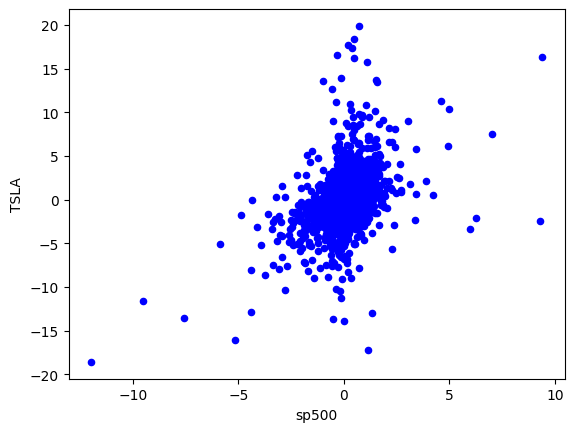

In [16]:
stocks_daily_return.plot(kind='scatter',x='sp500',y='TSLA',color='blue')

In [17]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))

Beta for TSLA stock is = 1.2359723602006576 and alpha is = 0.137162009932369


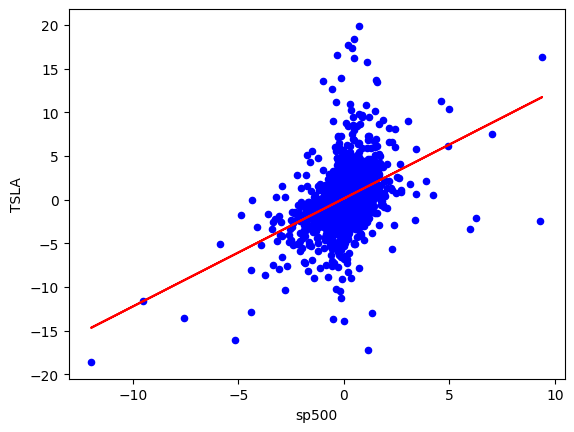

In [18]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'b')
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

In [19]:
beta_MGM, alpha_MGM = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['MGM'], 1)
print('Beta for {} MGM stock is = {} and MGM alpha is = {}'.format('MGM', beta_MGM, alpha_MGM))

Beta for MGM MGM stock is = 1.6517124147928917 and MGM alpha is = -0.030189775264089152


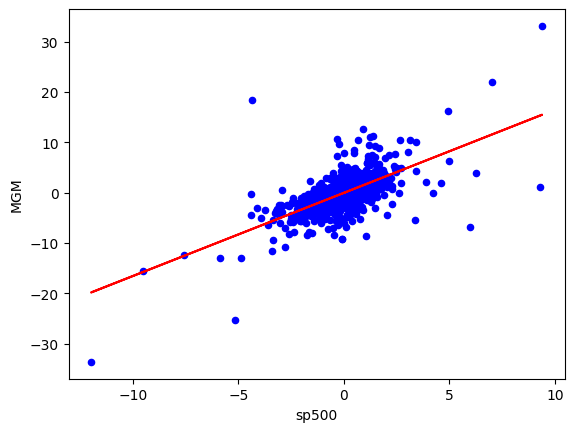

In [20]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'MGM', color = 'b')
plt.plot(stocks_daily_return['sp500'], beta_MGM * stocks_daily_return['sp500'] + alpha_MGM, '-', color = 'r')

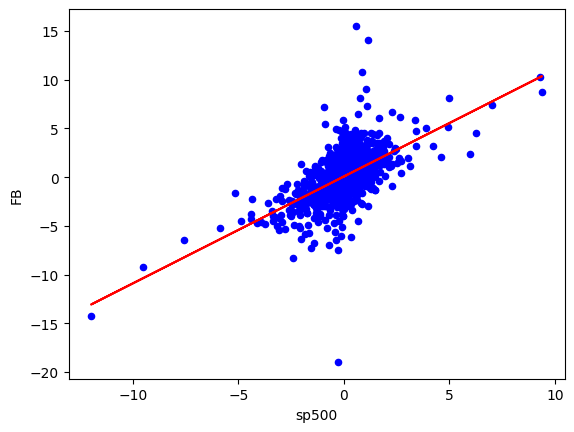

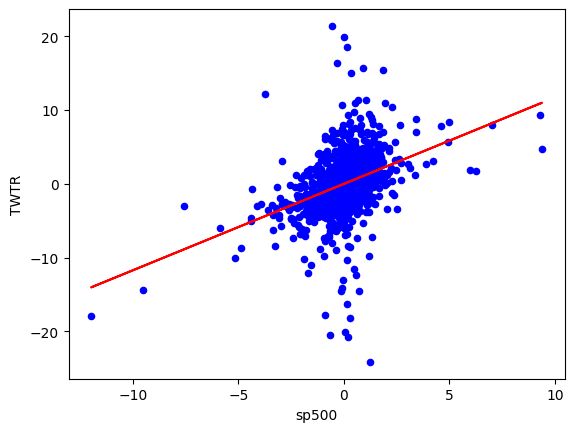

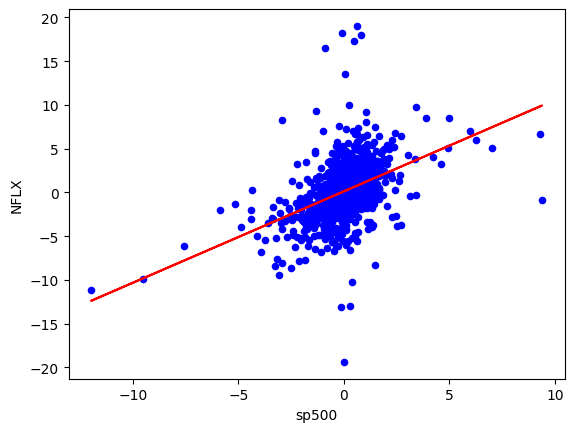

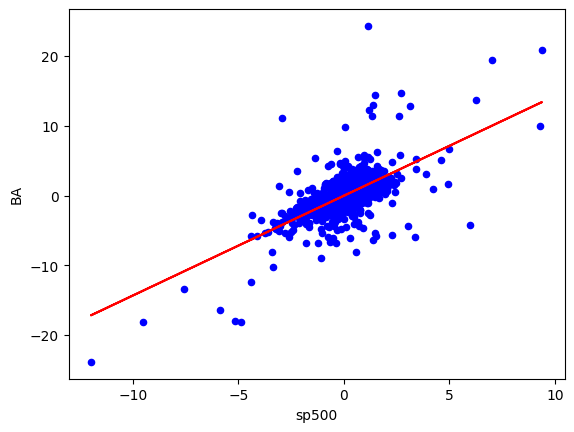

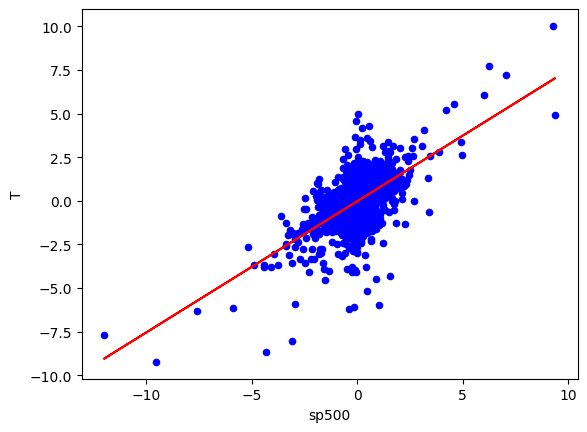

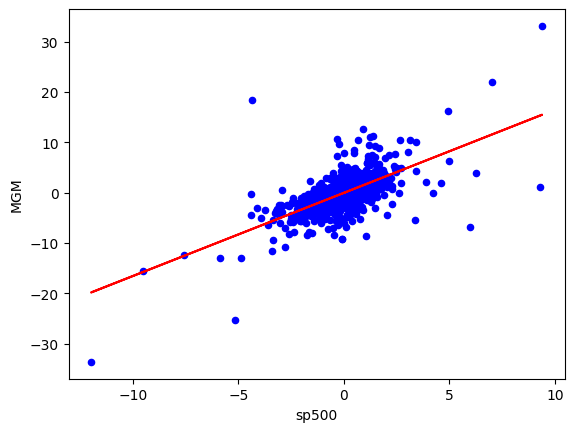

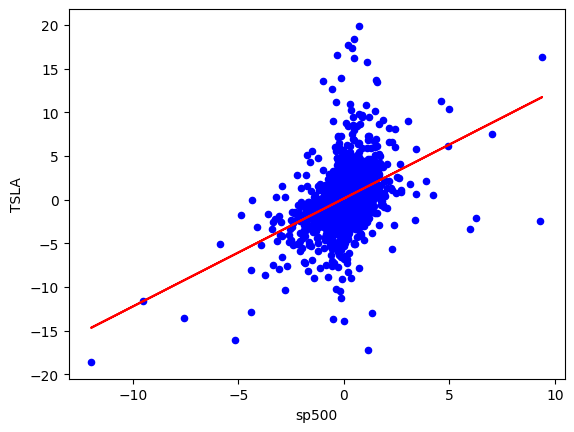

In [22]:
beta = {}
alpha = {}

for i in stocks_daily_return.columns:


  if i != 'Date' and i != 'sp500':

    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color = 'b')


    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [23]:
beta

{'FB': 1.096849088020326,
 'TWTR': 1.172359618315995,
 'NFLX': 1.0445724485449472,
 'BA': 1.4304608163084231,
 'T': 0.7523861924715606,
 'MGM': 1.6517124147928917,
 'TSLA': 1.2359723602006576}

In [24]:
for i in stocks_daily_return.columns:

  if i != 'Date' and i != 'sp500':


    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)


    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)


    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()